In [2]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [38]:
# What do we want our DataFrame to look like?

In [39]:
# OUTPUT / HEADLINES
# How have states performed in their management of the Covid Crisis?
## 1. Ranking of states by death rate
### Data: rows: States columns: Deaths, Population (Death Rate), Nice (by month)
## 2. Excess death rate by state, Nice by month
### Compare 1 and 2 - are they the same? Is reporting accurate?
## 3. Can we normalize death rate by age?
### by state, population by age group, death rate (deaths/population) by age group

In [40]:
# DATA
# by state, by month, by age group
## deaths, population
# by state, by month
## excess deaths

Death Rate by State

In [3]:
df1 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")

In [4]:
df1.rename(columns={"Unnamed: 0": "State", "Covid_Death_Rate":"Cum_Covid_19_Death_Rate"},inplace=True)
df1.drop([0,1,2,3,4,12,36,41,60,62,54,56,61],inplace=True)
df1 = df1.reset_index(drop=True)

In [125]:
states = df1["State"]
death_rate = df1["Cum_Covid_19_Death_Rate"]
df1.iloc[0,0]

'AK'

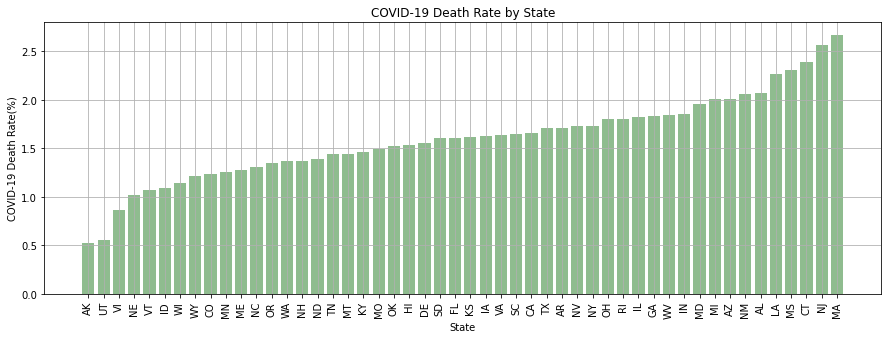

In [6]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, color='darkseagreen')
plt.grid(True)
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.savefig("Output/death-rate-by-state.png")
plt.show()

Age Data Analysis

In [52]:
age_data = pd.read_csv("../Folder3/final-age-data.csv")
us_byage_df = age_data.loc[age_data.State=="United States"][["Age Group","Population %"]]
age_data

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %,COVID-19 Death Rate by Age
0,1/1/20,4/24/21,By Total,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174,5.963145,0.006099
1,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434,0.017579
2,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152,0.151394
3,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896,0.671048
4,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768,1.744259
5,1/1/20,4/24/21,By Total,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528,12.456919,4.869001
6,1/1/20,4/24/21,By Total,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273,12.938715,12.335556
7,1/1/20,4/24/21,By Total,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289,9.596938,22.118762
8,1/1/20,4/24/21,By Total,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150,4.868197,27.662040
9,1/1/20,4/24/21,By Total,United States,85 years and over,169545.0,1295280.0,6592716.0,2.571702,2.012835,30.412423


In [46]:
age_data = age_data.loc[age_data['Age Group']!='All Ages']

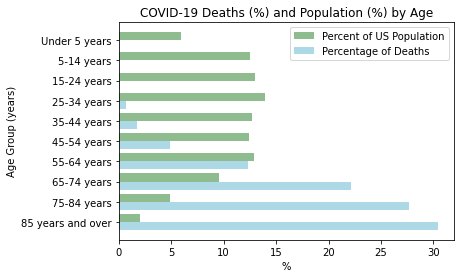

In [9]:
x_axis = []
x_axis = age_data['Age Group'].tolist()
ind = np.arange(len(x_axis))
width = 0.4

death_axis = age_data['COVID-19 Death Rate by Age'].astype(float)
pop_axis = age_data['Population %'].astype(float)
fig, ax = plt.subplots()

ax.barh(ind-width, pop_axis, width, label ='Percent of US Population', color='darkseagreen', align='center')
ax.barh(ind, death_axis, width, color='lightblue', label='Percentage of Deaths', align='center')


ax.set_yticks(ind-.2)
ax.legend()
ax.set_xlabel('%')
ax.set_ylabel('Age Group (years)')
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('COVID-19 Deaths (%) and Population (%) by Age')
plt.savefig('Output/COVID-19 Deaths (%) and Population (%) by Age.png')
plt.show()

Age normalization

In [47]:
age_df = pd.read_csv("../Folder3/age-pop-state.csv")
us_byage_df
us_byage = {}
for index,row in us_byage_df.iterrows():
    us_byage[row[0]]=row[1]
    
us_byage  

{'Under 5 years': 5.963145345737688,
 '5-14 years': 12.495433524360758,
 '15-24 years': 13.006152458646906,
 '25-34 years': 13.97589611628876,
 '35-44 years': 12.685768094254609,
 '45-54 years': 12.4569187176404,
 '55-64 years': 12.938714833115196,
 '65-74 years': 9.596938238192193,
 '75-84 years': 4.868197195444035,
 '85 years and over': 2.012835476319459}

death rate/age group[newcolumm]
import us population
us pop or %
deathrate/age group * us pop %
group by state
sum


In [92]:
age_df["Death_Rate_by_Age"]=""
age_df["US_Population_by_Age"]=""
age_df["Normalized_Death_Rate"]=""
us_byage_df
for index, row in age_df.iterrows():
    age_df.loc[index,"Death_Rate_by_Age"] = float(age_df.loc[index,"COVID-19 Deaths"]/age_df.loc[index,"Population"])
    age_group = row[4]
    age_df.loc[index,"US_Population_by_Age"] = float(us_byage[age_group])
    age_df.loc[index,"Normalized_Death_Rate"] = age_df.loc[index,"US_Population_by_Age"]*age_df.loc[index,"Death_Rate_by_Age"]
    state = row[3]
    age_df.loc[index,"State"] = us_state_abbrev[state]


In [98]:
age_df.head()

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Population,Death_Rate_by_Age,US_Population_by_Age,Normalized_Deaths,Normalized_Death_Rate
0,1/1/20,4/24/21,By Total,AL,Under 5 years,0.0,294357.0,0,5.96315,0,0
1,1/1/20,4/24/21,By Total,AL,5-14 years,0.0,608466.0,0,12.4954,0,0
2,1/1/20,4/24/21,By Total,AL,15-24 years,11.0,635707.0,1.73036e-05,13.0062,0.000225053,0.000225053
3,1/1/20,4/24/21,By Total,AL,25-34 years,71.0,647229.0,0.000109698,13.9759,0.00153313,0.00153313
4,1/1/20,4/24/21,By Total,AL,35-44 years,204.0,593306.0,0.000343836,12.6858,0.00436182,0.00436182


In [99]:
a = age_df.groupby(by=age_df["State"])["Population"].sum()
b = age_df.groupby(by=age_df["State"])["COVID-19 Deaths"].sum()
c = 100*b/a
d = age_df.groupby(by=age_df["State"])["Normalized_Death_Rate"].sum()
e = d/c

In [103]:
dff.head()

,Actual_DR,Normalized_DR,Delta,Adj_for_age_Covid_Death_Rate
State,,,,
AK,0.043606,0.063322,1.452128,
AL,0.212372,0.207580,0.977434,
AR,0.195009,0.189573,0.972121,
AZ,0.213197,0.204625,0.959793,
CA,0.159406,0.172598,1.082753,


In [117]:
dff = pd.DataFrame({"Actual_DR":c,"Normalized_DR":d,"Delta":e})
dff.sort_values(by="Delta",ascending=False)
dfff = dff.merge(df1,on="State")
dfff.head()
    

,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate
0,AK,0.043606,0.063322,1.452128,0.521335
1,AL,0.212372,0.207580,0.977434,2.063941
2,AR,0.195009,0.189573,0.972121,1.707780
3,AZ,0.213197,0.204625,0.959793,2.008587
4,CA,0.159406,0.172598,1.082753,1.662034


In [148]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder4'

In [149]:
dfff["Adj_for_age_Covid_Death_Rate"]=""
for index,row in dfff.iterrows():
    dfff.loc[index,"Adj_for_age_Covid_Death_Rate"]=dfff.loc[index,"Delta"]*dfff.loc[index,"Cum_Covid_19_Death_Rate"]
dfff.to_csv("Output/Adj_for_age_Death_Rate.csv")

In [140]:
dfff = dfff.sort_values(by="Cum_Covid_19_Death_Rate")
adj_death_rate = dfff["Adj_for_age_Covid_Death_Rate"]
death_rate = dfff["Cum_Covid_19_Death_Rate"]
states = dfff["State"]

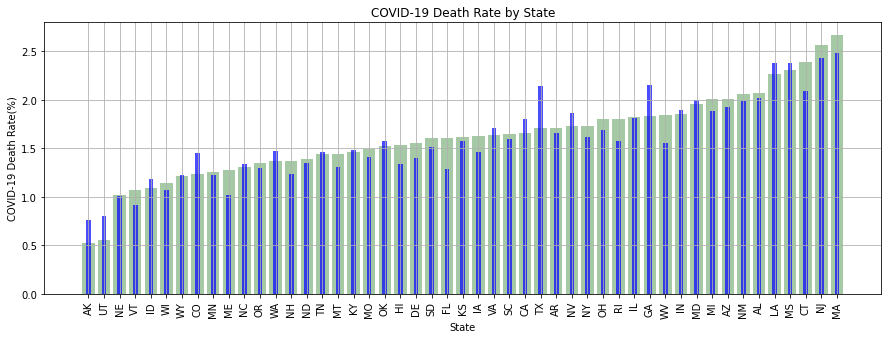

In [146]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, color='darkseagreen',alpha=0.8)
plt.bar(states,adj_death_rate, color='blue',alpha=0.7,width=0.3)
plt.grid(True)
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.xlabel('State')
plt.xticks(rotation = 90)
# plt.savefig("Output/death-rate-by-state.png")
plt.show()

In [48]:
# Can we explain the above / what are other factors?

In [49]:
# EXPLANATION / CORRELATED FACTORS
## Health - insurance cover, hospital beds, prevalence of health conditions
## Preventative Measures - masks, gatherings, lockdowns, politics
## Geographical - climate, dispersion
## Demographics - income, race, [age], sex, 
## Timing - vaccinations, surges

Health Data - Hospital Beds

In [86]:
hospital_df = pd.read_csv("../Folder1/hospitalbeds_percapita_bystate.csv",skiprows=(0,1))

In [87]:
hospital_df.drop([52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],inplace=True)
hospital_df = hospital_df.reset_index(drop=True)

In [88]:
hospital_df

,Location,State/Local Government,Non-Profit,For-Profit,Total
0,United States,0.3,1.7,0.4,2.4
1,Alabama,1.4,0.8,0.9,3.1
2,Alaska,0.3,1.5,0.4,2.2
3,Arizona,0.1,1.4,0.5,1.9
4,Arkansas,0.3,2.1,0.6,3.0
5,California,0.3,1.2,0.3,1.9
6,Colorado,0.4,1.1,0.4,1.9
7,Connecticut,0.1,1.9,0.0,2.0
8,Delaware,NaN,2.1,0.0,2.2
9,District of Columbia,NaN,3.5,1.0,4.5


In [89]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [94]:
total_beds = []
total_beds = hospital_df['Total'].tolist()

In [92]:
Dict = {"States":[]}
for state in states:
    Dict["States"].append(us_state_abbrev[state])

KeyError: nan

In [84]:
hospital_beds = pd.DataFrame(Dict)
hospital_beds['Total Beds'] = total_beds

ValueError: Length of values (63) does not match length of index (52)

In [55]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
df_deathrate = df_deathrate.loc[df_deathrate['States']!='RMI']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='FSM']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='AS']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='NYC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PW']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='DC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PR']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='GU']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='MP']

In [56]:
df_deathrate = df_deathrate.dropna()

In [58]:
df_deathrate = df_deathrate.reset_index(drop=True)
df_deathrate

,States,Covid_Death_Rate
0,AK,0.521335
1,UT,0.554209
2,VI,0.864000
3,NE,1.020306
4,VT,1.071802
5,ID,1.090293
6,WI,1.143160
7,WY,1.215988
8,CO,1.231980
9,MN,1.256834


In [ ]:
df_merge = df_deathrate.merge(hospital_beds, how='inner', on="States")

In [ ]:
state_names = df_merge["States"]
total_beds = df_merge["Total Beds"]
Covid_Death_Rate = df_merge["Covid_Death_Rate"]

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(state_names, total_beds, label='Total Hospital Beds(%)', color='darkseagreen')
plt.bar(state_names, Covid_Death_Rate, label='COVID-19 Death Rate(%)', width=.4, color='lightblue')
plt.grid(True, color='lightgrey')
plt.title('Total Hospital Beds and Covid Death Rate by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.savefig("Output/death-rate-and-beds-by-state.png")
plt.show()

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_beds, Covid_Death_Rate)

regress_values = total_beds * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(total_beds,Covid_Death_Rate)

plt.plot(total_beds,regress_values,"lightblue")

r_sqr = round(rvalue**2,2)

plt.annotate(line_eq,(3, .8),fontsize=10,color="black")

plt.annotate(f"The r-squared is: {r_sqr}",(25,0.5),fontsize=10,color="black")

plt.xlabel('Total Beds')
plt.ylabel('Covid Death Rate %')
plt.title("Total Hospital Beds and Covid Deaths by State")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")

for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[1]))

plt.savefig("Output/total-beds-and-deaths-regression.png")
plt.show()


In [ ]:
## Preventative Measures
# DATA
## by state, by month (or day)
### # of days with mask mandate, lock down, policy on gatherings (yes,no !>10), politics (red or blue / last election)

In [ ]:
## Geography
# DATA
## by state, by day
### min temp - max temp, days within a certain temperature range, humidity, rural and urban populations

In [ ]:
## Demographics
# DATA
## by state
## income, population (or income per capita), population by race, population by age, population by sex

In [ ]:
## Timing
# DATA
## by state, by month (better by day)
### Vaccinations, deaths, infections

In [ ]:
# DataFrame1 - by state, by day data
## Columns
### temperature (max/min), humidity, vaccinations, infections, deaths, mask mandate, gatherings

# DataFrame2 - by month data
## Columns
### excess deaths

# DataFrame3 - by state, no change with time
## Columns
### population, hospital beds, sex, race, insurance cover, health conditions, geographical dispersion (urban versus rural)
### income, population [by age group: 20, 30, etc... ], politics